In [2]:
import os
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0. Loading the data

Downloading the data, so that we don't have to do it again if we restart the kernel

In [3]:
urls=["https://info0.s3.us-east-2.amazonaws.com/recruitment/positions.csv","https://info0.s3.us-east-2.amazonaws.com/recruitment/education.csv","https://info0.s3.us-east-2.amazonaws.com/recruitment/jobtitle_seniority.csv"]

# data folder, create if it does not exists
os.makedirs('./data/', exist_ok=True) 
    
# if .csv file does not exists, download it
for url in urls:
    path='./data/' + os.path.basename(url)
    if not os.path.exists(path):
        urllib.request.urlretrieve(url, path)
        
print('data downloaded')

data downloaded


Loading the data into pandas data frames

In [4]:
df_positions = pd.read_csv("./data/positions.csv")
df_education = pd.read_csv("./data/education.csv")
df_seniority = pd.read_csv("./data/jobtitle_seniority.csv")

# 1. Checking the data

## 1.1 Individual data frames

In [5]:
df_positions=df_positions.sort_values(by=['user_id'])
df_positions.tail(10)

,user_id,jobtitle,startdate,enddate
162425,zzdHAVxl9iQrwom22S/FLg5+2cvffV/mNepQVJd0smgtpB...,student_senior_service_college,2012-08-01,2013-06-01
15089,zzdHAVxl9iQrwom22S/FLg5+2cvffV/mNepQVJd0smgtpB...,command_general_staff_college,2004-07-01,2005-06-01
146169,zzdHAVxl9iQrwom22S/FLg5+2cvffV/mNepQVJd0smgtpB...,engineer_company_brigade_staff_trainer,2002-04-01,2004-06-01
15923,zzdHAVxl9iQrwom22S/FLg5+2cvffV/mNepQVJd0smgtpB...,student_engineer_officer,1998-01-01,1998-10-01
20486,zzdHAVxl9iQrwom22S/FLg5+2cvffV/mNepQVJd0smgtpB...,company_commander_battalion_battalion_assistant,1998-11-01,2002-03-01
309939,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,partner_head_private_client_department_|_law_p...,1992-01-01,NaN
338504,zzvZxBSf81furoFl3PcSuHAG1BvSkUYANepQVJd0smgtpB...,coordinador_de_personal_embarcado,2017-12-01,NaN
334912,zzvZxBSf81furoFl3PcSuHAG1BvSkUYANepQVJd0smgtpB...,operador_|_logistics_supply_chain,2014-11-01,2015-09-01
359048,zzvZxBSf81furoFl3PcSuHAG1BvSkUYANepQVJd0smgtpB...,supervisor_de_personal_|_maritime,2016-05-01,2017-09-01
248375,zzvZxBSf81furoFl3PcSuHAG1BvSkUYANepQVJd0smgtpB...,supervisor_de_personal_|_logistics_supply_chain,2015-11-01,2016-05-01


#### Looking at the dates, linkedIn only has the year and month information, so date formatting is YYYY-MM-DD
#### Position titles and fields are seperated by '\_|\_', words are seperated by '_'

In [6]:
df_education=df_education.sort_values(by=['user_id'])
df_education.head()

,user_id,major,startdate,enddate
99508,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,BS,1949-01-01,1953-01-01
92083,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,BS in Electronics,1973-01-01,1978-01-01
92505,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,NaN,1984-01-01,1987-01-01
133238,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,Master Grande Ecole,2013-01-01,2016-01-01
5126,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,Bachelor of Science (B.Sc.) (ED),2001-01-01,2006-01-01


In [7]:
df_seniority=df_seniority.sort_values(by=['user_id'])
df_seniority.head()

,user_id,jobtitle,seniority
90141,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,former_owner_presently_consultant,7.064817
71129,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,design_engineer_|_mechanical_industrial_engine...,3.331507
222292,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,owner_|_computer_network_security,7.334247
399946,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,digital_communication_social_medias_activation...,4.307247
220871,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,event_promoter_public_relations,1.908356


In [8]:
print(df_education.info())
print(df_positions.info())
print(df_seniority.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226184 entries, 99508 to 169422
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    226184 non-null  object
 1   major      162346 non-null  object
 2   startdate  197556 non-null  object
 3   enddate    190658 non-null  object
dtypes: object(4)
memory usage: 8.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 377585 entries, 41525 to 248375
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    377585 non-null  object
 1   jobtitle   376136 non-null  object
 2   startdate  368526 non-null  object
 3   enddate    270354 non-null  object
dtypes: object(4)
memory usage: 14.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 416295 entries, 90141 to 126315
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   

#### Not all data frames have 100k users, all have to take this into account when merging the data frames.
We will assume that we want to predict the age of all users

In [9]:
# give the number of DISTINCT users
def count_users(df):
    return len(pd.unique(df['user_id']))

print(count_users(df_positions))
print(count_users(df_education))
print(count_users(df_seniority))

81464
100000
100000


#### As expected a person can have multiple education, and position entries

In [10]:
test_id =df_education.iat[2,0] # this is an arbitrary user_id

def get_user_history(user_id):
    print(df_education[df_education['user_id'].str.contains(user_id,regex=False,na=False)][['major', 'startdate','enddate']])
    print(df_positions[df_positions['user_id'].str.contains(user_id,regex=False,na=False)][['jobtitle', 'startdate','enddate']])
    print(df_seniority[df_seniority['user_id'].str.contains(user_id,regex=False,na=False)][['jobtitle', 'seniority']])

get_user_history(test_id)

                   major   startdate     enddate
92083  BS in Electronics  1973-01-01  1978-01-01
92505                NaN  1984-01-01  1987-01-01
                                                 jobtitle   startdate  \
9781                    owner_|_computer_network_security  1993-06-01   
106525  design_engineer_|_mechanical_industrial_engine...  1984-10-01   

           enddate  
9781           NaN  
106525  1989-05-01  
                                                 jobtitle  seniority
71129   design_engineer_|_mechanical_industrial_engine...   3.331507
222292                  owner_|_computer_network_security   7.334247


## 1.2 Missing values

#### Missing values for each df
There are more missing values for end dates because it can the current position / education program of someone

Missing values for dates are more important than for education/jobtittles to predict the age

In [11]:
#Missing values
print(df_positions.isna().sum(),'------',sep='\n')
print(df_education.isna().sum(),'------',sep='\n')
print(df_seniority.isna().sum(),'------',sep='\n')

user_id           0
jobtitle       1449
startdate      9059
enddate      107231
dtype: int64
------
user_id          0
major        63838
startdate    28628
enddate      35526
dtype: int64
------
user_id         0
jobtitle     2005
seniority       0
dtype: int64
------


#### Missing starting dates AND enddates are problematic because it makes it hard to impute data

In [12]:
df_missing_pos=df_positions[df_positions['enddate'].isna() & df_positions['startdate'].isna()]
df_missing_sen=df_seniority[df_seniority['seniority'].isna() ]
df_missing_edu=df_education[df_education['enddate'].isna() & df_education['startdate'].isna()]
print(count_users(df_missing_pos),'unique users missing job date info in df_positions')
print(count_users(df_missing_sen),'unique users missing seniority info')
print(count_users(df_missing_edu),'unique users missing education date info')



6518 unique users missing job date info in df_positions
0 unique users missing seniority info
18036 unique users missing education date info


#### This is even more true if there are no dates for both the education and job entries

In [13]:
df_missing_all=df_missing_pos.merge(df_missing_edu, how='inner',left_on=['user_id'], right_on=['user_id'])
print(count_users(df_missing_all),'unique users missing dates on all education and job info')

981 unique users missing dates on all education and job info


# 2. Splitting the data to get training data 

## dataprocessing will be done after to prevent data leakage

## 2.1 Choosing the training Data

People with highscool information have ages that are easy to predict since most people end highschool at the same age.
The same is true for Bachelors. 
As a general rule, the ealier the education is in terms of degree, the better it is to predict the age because of the smaller variability.

However as a general rule, masters happen after bachelors for example, and thus can still give information. Some text processing will be beneficial to encode the type of degree.

Because there are more people with bachelor information (1/3 of the data) we will use the starting date of the bachelor to determine someone's age for the training data

In [14]:
mask_high = df_education.major.apply(lambda x: ('highschool' in str(x).lower()) or ('high school' in str(x).lower()) )
print(count_users(df_education[mask_high]),'unique users with a highschool info')

3368 unique users with a highschool info


In [15]:
bachelors=['bachelor','bs ','ba ','b.s.','b.a.']
mask_ba = df_education.major.apply(lambda x:  any(bachelor in str(x).lower() for bachelor in bachelors))
print(count_users(df_education[mask_ba]),'unique users with a bachelor info')

37463 unique users with a bachelor info


In [16]:
bachelors=['bachelor']
mask_ba = df_education.major.apply(lambda x:  any(bachelor in str(x).lower() for bachelor in bachelors))
print(count_users(df_education[mask_ba]),'unique users with a bachelor info containing exactly \'bachelor\'')

33931 unique users with a bachelor info containing exactly 'bachelor'


#### We will use the later as it is simpler to work with, and 1/3 of the data as training data is enough.
##### we will use NLP and clustering to encode similer majors, taking into account abbreviations such as 'bs' or 'b.s.'

In [17]:
# using the mask to get the list of users that are used for the traning data
training_users=pd.unique(df_education[mask_ba]['user_id']).tolist()

## 2.2 Splitting the data frames

##### We split the users that have bachelor info into training data and validation data to later measure the performance of the models

##### The rest of the users (about 2/3) is the testing data that has no label

In [18]:
from sklearn.model_selection import train_test_split

# split the df into train, val and test data
def split_df(users,df):
    # 1/3 of the users with label is going to be used as val data
    users_train,users_val=train_test_split( users, test_size = 0.3, random_state = 42)
    # training, val, and testing data
    df_train=df.loc[df['user_id'].isin(users_train)]
    df_val=df.loc[df['user_id'].isin(users_val)]
    df_test=df.loc[~ df['user_id'].isin(users)]
    return df_train,df_val,df_test

# we have three data frames to split
df_positions_train,df_positions_val,df_positions_test=split_df(training_users,df_positions)
df_education_train,df_education_val,df_education_test=split_df(training_users,df_education)
df_seniority_train,df_seniority_val,df_seniority_test=split_df(training_users,df_seniority)


# checking that we still have every user
assert(count_users(df_positions_train)+count_users(df_positions_val)+count_users(df_positions_test)==count_users(df_positions)) #posisions does not have 100k users
assert(count_users(df_education_train)+count_users(df_education_val)+count_users(df_education_test)==count_users(df_education))
assert(count_users(df_seniority_train)+count_users(df_seniority_val)+count_users(df_seniority_test)==count_users(df_seniority))


# 3 Data processing

In [19]:
from datetime import datetime
import random
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
#import multiprocessing as mp

## 3.1 Explanation and thought process
##### This sub part explains the data processing step by step. It has no other purpose, and does not have to be executed

Text processing: this step aims to generate usefull information with the major titles and job titles. Because highschool, bachelor and majors are not done at the same moment, they can give valuable information.

In [105]:
df_education=df_education_train.copy()
df_positions=df_positions_train.copy()
df_seniority=df_seniority_train.copy()

In [106]:
# text clustering is only fitted on training data to prevent data leakage
texts=df_education['major'].tolist()
len(texts)

53940

In [107]:
processed_text=[]
for t in texts:
    if (not pd.isnull(t)) and (not 'bachelor' in t.lower() or random.random()<0.33): # removing one third of bechelors to match the rest of the data set
        processed_text.append(t)
len(processed_text)

23703

In [108]:
processed_text[:20]

['HHX',
 'Master (Cand.mag.)',
 'Master of Education (MEd)',
 'Associate of Science (A.S.)',
 'Master of Arts (MA)',
 "Master's degree",
 'Masters, Psychology of Safety and Ergonomics',
 'Bachelor of Applied Science (BASc)',
 'B.S.',
 'Master of Public Administration (MPA)',
 'Bachelor of Technology (B.Tech.)',
 "Bachelor's degree",
 'Engineering',
 "Bachelor's degree",
 'Bachelors, Psychology',
 'TEFL CertificateTEFL Certificate',
 "Bachelor's of Science",
 'Bachelor of Science (B.S.)',
 'Juris Doctor',
 'Bachelor of Science (BSc)']

In [109]:
number_of_clusters = 10
majors_pipe = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1, 4))), ('majors_model', KMeans(n_clusters=number_of_clusters, init='k-means++', max_iter=50, n_init=2))])
majors_pipe.fit(processed_text)
order_centroids = majors_pipe['majors_model'].cluster_centers_.argsort()[:, ::-1]
terms = majors_pipe['vectorizer'].get_feature_names_out()

for i in range(0,number_of_clusters):
    print("class %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('-------')

class 0:
 of
 master
 diploma
 masters
 bachelors
 associate
 master of
 in
 degree
 certificate
-------
class 1:
 degree
 bachelor
 bachelor degree
 in
 degree in
 bachelor degree in
 of
 and
 degree of
 science
-------
class 2:
 of
 science
 bachelor
 bachelor of
 of science
 bachelor of science
 science bs
 bs
 bachelor of science bs
 of science bs
-------
class 3:
 of philosophy
 philosophy
 of
 doctor
 doctor of
 doctor of philosophy
 of philosophy phd
 philosophy phd
 phd
 doctor of philosophy phd
-------
class 4:
 science
 of
 master of
 master
 master of science
 of science
 of science ms
 ms
 master of science ms
 science ms
-------
class 5:
 of
 of business
 business
 administration
 of business administration
 business administration
 master of
 master
 master of business
 master of business administration
-------
class 6:
 master
 degree
 master degree
 in
 master degree in
 degree in
 and
 39 degree
 master 39
 master 39 degree
-------
class 7:
 school
 high
 high school
 

In [110]:
def add_cluster_edu(df):
    majors=df['major'].astype(str).tolist()
    major_clusters=majors_pipe.predict(majors)
    df['major_cluster']=major_clusters
add_cluster_edu(df_education_train)

In [111]:
add_cluster_edu(df_education_val)
add_cluster_edu(df_education_test)

In [ ]:
df_education_train[df_education_train['major_cluster']==3].head()

In [ ]:


#Usefull functions


def to_lower_case(df,col):
    df[col] =  df[col].str.lower()
    return df 
def to_datetime(df,col):
    df[col] =  pd.to_datetime(df[col], format='%Y-%m-%d')
    df[col] =  df[col].dt.year+ df[col].dt.month/13
    return df

print('changing dates and text format \n')

df_education = df_education.pipe(to_lower_case, col='major').pipe(to_datetime,col='startdate').pipe(to_datetime,col='enddate')
df_positions = df_positions.pipe(to_lower_case, col='jobtitle').pipe(to_datetime,col='startdate').pipe(to_datetime,col='enddate')
df_seniority = df_seniority.pipe(to_lower_case, col='jobtitle')

In [ ]:
#filling missing values

def fill_end_dates(df):
    now = datetime.now()
    today=now.year+now.month/13
    #print('today',today)
    before=df['enddate'].isna().sum()
    df['enddate']=df.apply(lambda row: today if pd.isnull(row['enddate']) and (not pd.isnull(row['startdate'])) else row['enddate'],axis=1)
    print('added',before-df['enddate'].isna().sum(),'values \n')
    return df

print('completing position end dates...')

df_positions=fill_end_dates(df_positions)
print('completing education end dates...')
df_education=fill_end_dates(df_education)


In [ ]:
def fill_startdate(df):
    df_nona=df[['startdate','enddate']].dropna(how='all',inplace=False)
    df_nona['length']=df_nona['enddate']-df_nona['startdate']
    avg_length=df_nona["length"].mean()
    print('average length: ',avg_length,'yrs')
    before=df['startdate'].isna().sum()
    df['startdate'].fillna(df['enddate']-avg_length, inplace=True)
    print('added',before-df['startdate'].isna().sum(),'values \n')
    return df
print('completing education start dates...')
df_education=fill_startdate(df_education)
print('completing position end dates...')
df_positions=fill_startdate(df_positions)

In [ ]:
def fill_dates_missingall(df):
    df_nona=df[['startdate','enddate']].dropna(how='all',inplace=False)
    #df_nona['length']=df_nona['enddate']-df_nona['startdate']
    avg_start=df_nona["startdate"].mean()
    avg_end=df_nona["enddate"].mean()
    print('average start date: ',avg_start,'yrs')
    print('average end date: ',avg_end,'yrs')
    before=df['startdate'].isna().sum()
    df['startdate'].fillna(avg_start, inplace=True)
    df['enddate'].fillna(avg_end, inplace=True)
    print('added',before-df['startdate'].isna().sum(),'values \n')
    return df  
print('completing education remaining dates...')
df_education=fill_dates_missingall(df_education)
print('completing position remaining dates...')
df_positions=fill_dates_missingall(df_positions)

In [ ]:
# filling missing education and positions
df_positions['jobtitle'].fillna('positions', inplace=True)
df_seniority['jobtitle'].fillna('positions', inplace=True)
df_education['major'].fillna('education', inplace=True)

In [ ]:
df_seniority['seniority'].fillna((df_seniority['seniority'].mean()), inplace=True)

In [ ]:
# sorting by startdate for later:
df_positions.sort_values(by=['startdate'],inplace=True)
df_education.sort_values(by=['startdate'],inplace=True)

In [ ]:
print(df_education.isna().sum())
print(df_seniority.isna().sum())
df_positions.isna().sum()

In [ ]:
df=df_positions.merge(df_seniority, how='right',left_on=['user_id','jobtitle'], right_on=['user_id','jobtitle']) # only position lacks users, hence right join
df=df.groupby('user_id').agg(lambda x: list(x))
df_education_temp=df_education.groupby('user_id').agg(lambda x: list(x))
df=df.merge(df_education_temp, how='outer', left_on='user_id', right_on='user_id')
len(df)

In [ ]:
test_id ='++NWXZ8bW3I7VaXV77eiwA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ=='
print(test_id)
get_user_history(test_id)

In [ ]:
missing_count={'jobtitle': 0,'startdate_x':0,'enddate_x':0,'startdate_y':0,'startdate_y':0,'major':0,'seniority':0}
mask=[]

for rowIndex, row in df.iterrows(): 
    ismissing=False
    for i, value in row.items():
        for n in value:
            if (pd.isnull(n)):
                ismissing=True
                missing_count[i]=missing_count[i]+1
    if ismissing:
        mask.append(True)
    else:
        mask.append(False)
missing_count

In [ ]:
len([x for x in mask if x])

In [ ]:
df

In [ ]:
df['startdate_x']=df.apply(lambda row: [max(row['enddate_y']) if pd.isnull(date) else date for date in row['startdate_x'] ] ,axis=1)
now = datetime.now()
today=now.year+now.month/13
df['enddate_x']=df['enddate_x'].apply(lambda dates: [today if pd.isnull(date) else date for date in dates])

## 3.2 Putting it all together:

#### Here we put every processing steps explained above in a class

In [20]:
# for the jobtitles that are '_' seperated
def tokenize(text):
    return(text.split('_'))

class DataTransformer:
    # to preven data leakage we use Class constants
    #class constants only changed when fit=True
    
    # different durations used for imputation, only changed with fit=True
    avg_length_job= avg_length_edu = avg_end_job = avg_start_job= avg_end_edu = avg_start_edu =0
    
    # pipelines for text processing, only trained with fit=True
    majors_pipe = jobs_pipe = None
    
    def __init__(self,df_positions,df_education,df_seniority):
        self.df_positions = df_positions.copy()
        self.df_education=df_education.copy()
        self.df_seniority = df_seniority.copy()
        
    ### pad arrays to fixed sixe for the df to be converted into a matrix
    def format_to_size(self,df,labels=False):
        print('Formatting dataframe to final size \n')
        def to_fixed_size(df,cols,size):
            for col in cols:
                # pad array with last element, or cut array to fixed sixe
                df[col] = df[col].apply(lambda x: x[0:size] if (len(x)>size) else  (x + (size-len(x)) * [x[-1]] ))
            
            return df
        
        return to_fixed_size(df,['enddate_y','startdate_y','seniority','enddate_x','startdate_x','major_cluster','job_cluster'],10)
    
    ### Get labels with the bachelor info
    def get_labels(self,df,remove_info=False):
        
        print('generating labels \n')
        df['label']=None
        
        # get the index of first substring occurence, we want the first bachelor degree 
        def get_first_index(mylist, substring):
            for i, s in enumerate(mylist):
                if substring in s:
                      return i
            return -1
        # iter through the df
        for index, row in df.iterrows():
            i=get_first_index(row['major'],'bachelor')
            # people start bachelors at 18
            birth=row['startdate_y'][i]-18
            
            if i!=-1:
                df.loc[index,'label'] = birth 
                
                 # remove bachelor info for training 
                if remove_info and len(row['enddate_y'])>1 and random.random()>0.3:
                    df.at[index,'enddate_y'] = row['enddate_y'][:i]+row['enddate_y'][i+1:]
                    df.at[index,'startdate_y'] = row['startdate_y'][:i]+row['startdate_y'][i+1:]
                    df.at[index,'major'] =  row['major'][:i]+row['major'][i+1:]
            else:
                print('ERROR COULD NOT GET LABEL FOR USER:', row.index.name)
        return df
    ### merge the positions,education and seniority df
    def merge_pd(self,df_positions, df_education,df_seniority,labels=False,remove_info=False):
        
        # sorting by startdate for later when using the bachelor info
        df_positions.sort_values(by=['startdate'],inplace=True)
        df_education.sort_values(by=['startdate'],inplace=True)
        
        # Right merge because positions does not have all users
        df=df_positions.merge(df_seniority, how='right',left_on=['user_id','jobtitle'], right_on=['user_id','jobtitle'])
        df=df.groupby('user_id').agg(lambda x: list(x))
        df_education_temp=df_education.groupby('user_id').agg(lambda x: list(x))
        df=df.merge(df_education_temp, how='inner', left_on='user_id', right_on='user_id')
        
        df['startdate_x']=df.apply(lambda row: [max(row['enddate_y']) if pd.isnull(date) else date for date in row['startdate_x'] ] ,axis=1)
        now = datetime.now()
        today=now.year+now.month/13
        df['enddate_x']=df['enddate_x'].apply(lambda dates: [today if pd.isnull(date) else date for date in dates])
        
        if labels: # add labels
            df=self.get_labels(df,remove_info)
        return df
    ###
    def transform_pd(self,df_positions, df_education,df_seniority,fit=False):
        
        def to_lower_case(df,col):
            df.loc[:,col] =  df[col].str.lower()
            return df 
        def to_datetime(df,col):
            df.loc[:,col] =  pd.to_datetime(df[col], format='%Y-%m-%d')
            df.loc[:,col] =  df[col].dt.year+ df[col].dt.month/13
            return df
        print('changing dates and text format \n')

        df_education = df_education.pipe(to_lower_case, col='major').pipe(to_datetime,col='startdate').pipe(to_datetime,col='enddate')
        df_positions = df_positions.pipe(to_lower_case, col='jobtitle').pipe(to_datetime,col='startdate').pipe(to_datetime,col='enddate')
        df_seniority = df_seniority.pipe(to_lower_case, col='jobtitle')
        
        def fill_end_dates(df):
            now = datetime.now()
            today=now.year+now.month/13
            #print('today',today)
            before=df['enddate'].isna().sum()
            df.loc[:,'enddate']=df.loc[:,:].apply(lambda row: today if pd.isnull(row['enddate']) and (not pd.isnull(row['startdate'])) else row['enddate'],axis=1)
            print('added',before-df['enddate'].isna().sum(),'values \n')
            return df

        print('completing position end dates...')

        df_positions=fill_end_dates(df_positions)
        print('completing education end dates...')
        df_education=fill_end_dates(df_education)

        def fill_startdate(df,typ):
            df_nona=df[['startdate','enddate']].dropna(how='all',inplace=False)
            df_nona['length']=df_nona['enddate']-df_nona['startdate']
            avg_length=0
            if fit:
                if typ=='edu':
                    DataTransformer.avg_length_edu=avg_length=df_nona["length"].mean()
                else:
                    DataTransformer.avg_length_job=avg_length=df_nona["length"].mean()
            else:
                if typ=='edu':
                    avg_length=DataTransformer.avg_length_edu
                else:
                    avg_length= DataTransformer.avg_length_job
                
            print('average length: ',avg_length,'yrs')
            before=df['startdate'].isna().sum()
            df['startdate'].fillna(df['enddate']-avg_length, inplace=True)
            print('added',before-df['startdate'].isna().sum(),'values \n')
            return df
        print('completing education start dates...')
        df_education=fill_startdate(df_education,'edu')
        print('completing position end dates...')
        df_positions=fill_startdate(df_positions,'job')
        
        def fill_dates_missingall(df,typ):
            df_nona=df[['startdate','enddate']].dropna(how='all',inplace=False)
            #df_nona['length']=df_nona['enddate']-df_nona['startdate']
            
            avg_start=avg_end=0
            if fit:
                if typ=='edu':
                    DataTransformer.avg_start_edu=avg_start=df_nona["startdate"].mean()
                    DataTransformer.avg_end_edu=avg_end=df_nona["enddate"].mean()
                else:
                    DataTransformer.avg_start_job=avg_start=df_nona["startdate"].mean()
                    DataTransformer.avg_end_job=avg_end=df_nona["enddate"].mean()
            else:
                if typ=='edu':
                    avg_start=DataTransformer.avg_start_edu
                    avg_end=DataTransformer.avg_end_edu
                else:
                    avg_start=DataTransformer.avg_start_job
                    avg_end=DataTransformer.avg_end_job
            
                
            print('average start date: ',avg_start,'yrs')
            print('average end date: ',avg_end,'yrs')
            before=df['startdate'].isna().sum()
            df['startdate'].fillna(avg_start, inplace=True)
            df['enddate'].fillna(avg_end, inplace=True)
            print('added',before-df['startdate'].isna().sum(),'values \n')
            return df  
        print('completing education remaining dates...')
        df_education=fill_dates_missingall(df_education,'edu')
        print('completing position remaining dates...')
        df_positions=fill_dates_missingall(df_positions,'job')
        
        # filling missing education and positions
        df_positions['jobtitle'].fillna('positions', inplace=True)
        df_seniority['jobtitle'].fillna('positions', inplace=True)
        df_education['major'].fillna('education', inplace=True)
        
        #filling missing seniority information
        df_seniority['seniority'].fillna((df_seniority['seniority'].mean()), inplace=True)
            
        
        return df_positions,df_education,df_seniority
    
    ####
    def get_edu_clusters(self,df,fit,remove_info):
        if fit:
            print('Fitting education clustering model')
            processed_text=[]
            for t in df['major'].tolist():
                r=0
                if remove_info:
                    r=random.random() # if training or val data remove bachelor data to match the testing data bachelor ratio
                if (not pd.isnull(t)) and (not 'bachelor' in t.lower() or r <0.33): # removing one third of bechelors to match the rest of the data set
                    processed_text.append(t)
            # clustering pipeline   

            number_of_clusters = 10
            DataTransformer.majors_pipe = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1, 4))), ('majors_model', KMeans(n_clusters=number_of_clusters, init='k-means++', max_iter=50, n_init=2))])
            DataTransformer.majors_pipe.fit(processed_text)
            
        # add cluster info to df
        print('Adding education cluster information \n')
        majors=df['major'].astype(str).tolist()
        major_clusters=DataTransformer.majors_pipe.predict(majors)
        df['major_cluster']=major_clusters
        
        return df
    ###
    def get_position_clusters(self,df,fit):
        if fit:
            print('Fitting jobtitle clustering model')
            processed_text=[]
            for t in df['jobtitle'].tolist():
           
                if (not pd.isnull(t)): # removing one third of bechelors to match the rest of the data set
                    processed_text.append(t)
            # clustering pipeline   

            number_of_clusters = 10
            DataTransformer.jobs_pipe = Pipeline([('vectorizer', CountVectorizer(tokenizer=tokenize,ngram_range=(1, 4),stop_words=['|'])), ('jobs_model', KMeans(n_clusters=number_of_clusters, init='k-means++', max_iter=50, n_init=2))])
            DataTransformer.jobs_pipe.fit(processed_text)
            
        # add cluster info to df
        print('Adding job title cluster information \n')
        jobs=df['jobtitle'].astype(str).tolist()
        jobs_clusters=DataTransformer.jobs_pipe.predict(jobs)
        df['job_cluster']=jobs_clusters
        
        return df
    ###
    def transform(self,fit=False,labels=False,remove_info=False):
        
        self.df_education=self.get_edu_clusters(self.df_education,fit,remove_info)
        self.df_seniority=self.get_position_clusters(self.df_seniority,fit)
        
        self.df_positions,self.df_education,self.df_seniority=self.transform_pd(self.df_positions, self.df_education,self.df_seniority,fit)
        merged=self.merge_pd(self.df_positions,self.df_education,self.df_seniority,labels,remove_info)
        
        
        return self.format_to_size(merged,labels)
    



## 3.3 Using the DataTransformer class to get our data.


#### a. Processing the training data
We remove the some bachelor info to match the testing data that we have to predict

The removal of some bachelor info is to make the model perform better on the test data where this info is not always available.

In [21]:
dataTransformer = DataTransformer(df_positions_train,df_education_train,df_seniority_train)
train_data =dataTransformer.transform(fit=True,labels=True,remove_info=True)

Fitting education clustering model
Adding education cluster information 

Fitting jobtitle clustering model
Adding job title cluster information 

changing dates and text format 

completing position end dates...
added 24017 values 

completing education end dates...
added 1815 values 

completing education start dates...
average length:  3.608725981355846 yrs
added 398 values 

completing position end dates...
average length:  3.962133030775858 yrs
added 21 values 

completing education remaining dates...
average start date:  2003.2742277481523 yrs
average end date:  2006.882953729532 yrs
added 6235 values 

completing position remaining dates...
average start date:  2010.1799402438633 yrs
average end date:  2014.1420732741742 yrs
added 1635 values 

generating labels 

Formatting dataframe to final size 



#### b. processing the validation data
We remove the info in the same manner as the training data for comparison purposes.

The removal of some bachelor info is to make the model perform better on the test data where this info is not always available.

In [22]:
dataTransformer = DataTransformer(df_positions_val,df_education_val,df_seniority_val)
val_data =dataTransformer.transform(fit=False,labels=True,remove_info=True) # val data has the same bachelor info as the training data

Adding education cluster information 

Adding job title cluster information 

changing dates and text format 

completing position end dates...
added 10174 values 

completing education end dates...
added 780 values 

completing education start dates...
average length:  3.608725981355846 yrs
added 135 values 

completing position end dates...
average length:  3.962133030775858 yrs
added 4 values 

completing education remaining dates...
average start date:  2003.2742277481523 yrs
average end date:  2006.882953729532 yrs
added 2837 values 

completing position remaining dates...
average start date:  2010.1799402438633 yrs
average end date:  2014.1420732741742 yrs
added 679 values 

generating labels 

Formatting dataframe to final size 



#### c. processing the testing data

In [23]:
dataTransformer = DataTransformer(df_positions_test,df_education_test,df_seniority_test)
test_data =dataTransformer.transform(fit=False,labels=False,remove_info=False)

Adding education cluster information 

Adding job title cluster information 

changing dates and text format 

completing position end dates...
added 64030 values 

completing education end dates...
added 5715 values 

completing education start dates...
average length:  3.608725981355846 yrs
added 879 values 

completing position end dates...
average length:  3.962133030775858 yrs
added 24 values 

completing education remaining dates...
average start date:  2003.2742277481523 yrs
average end date:  2006.882953729532 yrs
added 18144 values 

completing position remaining dates...
average start date:  2010.1799402438633 yrs
average end date:  2014.1420732741742 yrs
added 6696 values 

Formatting dataframe to final size 



# 4. Model

#### After testing multiple models from sklearn, ensemble methods such as random forest were the ones that worked the best

#### We are going to investigate Neural networks later 

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score
from sklearn.model_selection import cross_val_score,KFold


## 4.1  Dealing with imbalanced label distribution

In [25]:
#We want to randomly remove rows with labels that appear too ofter

#This returns a mask that will allow to smooth out the distribution of labels
def smooth_distrib(df):
    
    num_bins=30
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
    fig.suptitle('before, after birth year distribution')
    n, bins, patches=ax1.hist(df['label'], num_bins, facecolor='blue', alpha=0.5) 
    
    years=df['label']
    year_bins=[] # bin number array corresponding to the labels
    
    for year in years.tolist():
        year_bin=len(n)-1
        for i,b in enumerate(bins[1:]):
            if year<b:
                year_bin=i
                break
        year_bins.append(year_bin)
    
    # we will try to limit the number of labels per bin to the average bin size
    max_bin_size=sum(n)/len(n)
    smoothing_mask=[True if random.random()<max_bin_size/n[y] else False for y in year_bins]
    
    #plotting
    x1,x2,y1,y2 = ax1.axis()  
    ax2.hist(df[smoothing_mask]['label'], num_bins, facecolor='blue', alpha=0.5)
    _,_,_,_=ax2.axis((x1,x2,y1,y2))
    print(len(df[smoothing_mask]),'samples left')
    return smoothing_mask

8440 samples left


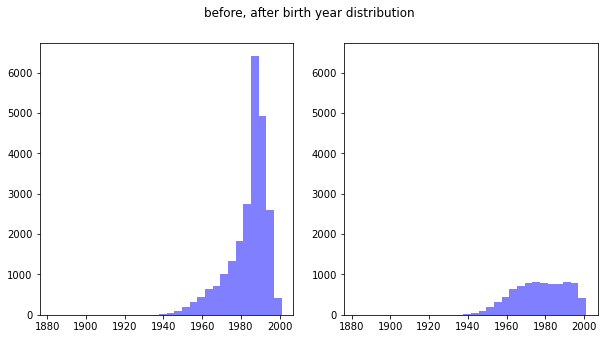

In [26]:
train_data_mask=smooth_distrib(train_data)

4958 samples left


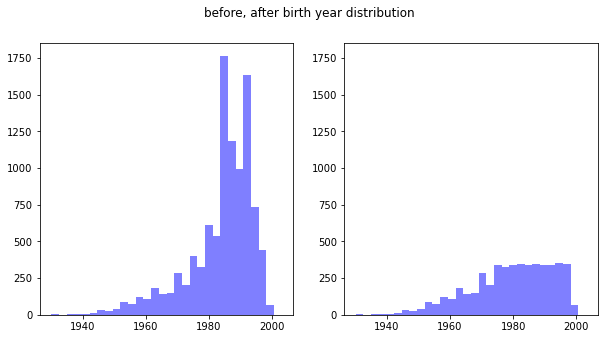

In [27]:
val_data_mask=smooth_distrib(val_data)

## 4.2 Feature selection

#### Formatting the data fo the model

In [40]:
#All feature cols, selection is done after
feature_cols=['enddate_y','startdate_y','seniority','enddate_x','startdate_x','major_cluster','job_cluster']

# We need to convert into a 2D array for the random forest model
def format_data_to_matrix(df,feature_cols):
        # convert to np array
        X=np.asarray(df[feature_cols].values.tolist())
        #reshape to matrix
        X=np.reshape(X, (len(X), X.shape[1]*X.shape[2]))
        if 'label' in df:
            y=np.asarray(df[['label']]).reshape(-1)
            return X,y
        # else, testing data with no labels
        return X


In [44]:
X_train,y_train=format_data_to_matrix(train_data[train_data_mask],feature_cols)
X_val,y_val=format_data_to_matrix(val_data[val_data_mask],feature_cols)
X_test=format_data_to_matrix(test_data,feature_cols) # no labels

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape)

(8440, 70) (8440,)
(4958, 70) (4958,)
(66069, 70)


#### Feature selection based on importance

In [52]:
# using random forest with all features to get the importance of each feature
from sklearn.feature_selection import SelectFromModel
clf = RandomForestRegressor(n_estimators=100,n_jobs=-1,min_samples_split=2,max_features='auto',min_samples_leaf=6,bootstrap=True,max_depth=60)
clf = clf.fit(X_train, y_train)
scores=[]
coefs=clf.feature_importances_
coefs=coefs.reshape(np.asarray(train_data[feature_cols].values.tolist()).shape[1:])
for i,feature in enumerate(feature_cols):
    print('max_coef of ',feature,10*np.max(coefs[i]))

max_coef of  enddate_y 0.5693464339881049
max_coef of  startdate_y 6.6321190891810655
max_coef of  seniority 0.04084649183989482
max_coef of  enddate_x 0.016552555968900432
max_coef of  startdate_x 0.11244148753989083
max_coef of  major_cluster 0.5258576152496
max_coef of  job_cluster 0.0038354418642639206


#### With no surprise, the startdates of the education history gives the most information on the birthday of a user.
#### The text clustering was useful, especially for the majors, as it is the third most important feature
##### We also expect features importance to deacrease over time:

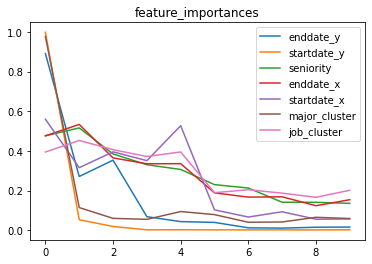

In [77]:
for i,feature in enumerate(feature_cols):
    line,=plt.plot(coefs[i]/np.linalg.norm(coefs[i]), label=feature)
plt.title('feature_importances')
plt.legend()
plt.show()

#### We will choose the most important features in category and time to get the best possible results

num of features: 1
0.7320003757418401
num of features: 6
0.8079825668273152
num of features: 11
0.8335223377031346
num of features: 16
0.8673672823249758
num of features: 21
0.8695648850264055
num of features: 26
0.8705702391850583
num of features: 31
0.8695043551465883
num of features: 36
0.8705779675062439
num of features: 41
0.8696718207654811
num of features: 46
0.8687565874328362
num of features: 51
0.8681933105263326
num of features: 56
0.8688858169804842
num of features: 61
0.8692148370575372
num of features: 66
0.8680670830710563


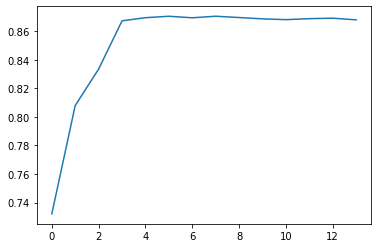

In [78]:
scores=[]
num_features=[]
for i in range(1,71,5):
    print('num of features:', i)
    features_model = SelectFromModel(clf, threshold=-np.inf,max_features=i,prefit=True)
    X_new = features_model.transform(X_train)
    clf_temp = RandomForestRegressor(n_estimators=100,n_jobs=-1,min_samples_split=2,max_features='auto',min_samples_leaf=2,bootstrap=True,max_depth=60)
    kf = KFold(n_splits=5, random_state=1,shuffle=True)
    score = np.mean(cross_val_score(clf_temp , X_new, y_train, cv = kf))
    print(score)
    plt.plot(num_features,scores)
    plt.show()


#### around 30 features seems to give good results, it is a good compromise between good accuracy and run time performance.

In [81]:
# reduce features
features_model = SelectFromModel(clf, threshold=-np.inf,max_features=30,prefit=True)
X_train=features_model.transform(X_train)
X_test=features_model.transform(X_test)
X_val=features_model.transform(X_val)

#### Tuning the hyperparameters with a random search
##### Set run_randomsearch to true to run the random search

In [86]:
#Params for search CV
n_estimators = [200,50,100]
max_features = ['auto', 'sqrt']
max_depth = [5,10,30]
max_depth.append(None)
min_samples_split = [2, 10, 25, 40]
min_samples_leaf = [2, 4, 6]
bootstrap = [True, False]
njobs=[-1] # multiprocessing is a lot faster

params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'n_jobs' : njobs
                }

run_randomsearch=False # bypass, saving time when runnign all the cells

if run_randomsearch:
    # Randomized search is faster 
    search = RandomizedSearchCV(RandomForestRegressor(), params, n_iter=50,refit = True,cv=5, verbose = 10) 

    search.fit(X_train, y_train) 

    # print best parameter after tuning 
    print(search.best_params_) 
    #scores
    y_pred = search.predict(X_val)
    print('r2 score', search.score(X_val,y_val))
    print('explained_variance_score',explained_variance_score(y_val, y_pred))
    print('validation mean abs error',mean_absolute_error(y_val, y_pred))
    print('validation RMSE',mean_squared_error(y_val, y_pred,squared=False))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=25, n_estimators=200, n_jobs=-1
[CV 1/5; 1/50] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=25, n_estimators=200, n_jobs=-1;, score=0.852 total time=   0.5s
[CV 2/5; 1/50] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=25, n_estimators=200, n_jobs=-1
[CV 2/5; 1/50] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=25, n_estimators=200, n_jobs=-1;, score=0.868 total time=   0.2s
[CV 3/5; 1/50] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=25, n_estimators=200, n_jobs=-1
[CV 3/5; 1/50] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=25, n_estimators=200, n_jobs=-1;, score=0.843 total time=   0.3s
[CV 4

[CV 4/5; 6/50] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=0.798 total time=   0.0s
[CV 5/5; 6/50] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, n_jobs=-1
[CV 5/5; 6/50] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=0.812 total time=   0.0s
[CV 1/5; 7/50] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=40, n_estimators=50, n_jobs=-1
[CV 1/5; 7/50] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=40, n_estimators=50, n_jobs=-1;, score=0.834 total time=   0.3s
[CV 2/5; 7/50] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=40, n_estimators=50, n_jobs=-1
[CV 2/5; 7/50] END bootstrap=False, max_depth=10, max_features=auto, min_

[CV 1/5; 12/50] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=40, n_estimators=50, n_jobs=-1;, score=0.874 total time=   0.1s
[CV 2/5; 12/50] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=40, n_estimators=50, n_jobs=-1
[CV 2/5; 12/50] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=40, n_estimators=50, n_jobs=-1;, score=0.875 total time=   0.2s
[CV 3/5; 12/50] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=40, n_estimators=50, n_jobs=-1
[CV 3/5; 12/50] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=40, n_estimators=50, n_jobs=-1;, score=0.844 total time=   0.1s
[CV 4/5; 12/50] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=40, n_estimators=50, n_jobs=-1
[CV 4/5; 12/50] END bootstrap=True, max_depth=10, max_features=auto

[CV 3/5; 17/50] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, n_jobs=-1;, score=0.801 total time=   0.2s
[CV 4/5; 17/50] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, n_jobs=-1
[CV 4/5; 17/50] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, n_jobs=-1;, score=0.803 total time=   0.2s
[CV 5/5; 17/50] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, n_jobs=-1
[CV 5/5; 17/50] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, n_jobs=-1;, score=0.809 total time=   0.2s
[CV 1/5; 18/50] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=40, n_estimators=100, n_jobs=-1
[CV 1/5; 18/50] END bootstrap=True, max_depth=30, max_features=aut

[CV 1/5; 23/50] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=0.853 total time=   0.0s
[CV 2/5; 23/50] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=50, n_jobs=-1
[CV 2/5; 23/50] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=0.870 total time=   0.0s
[CV 3/5; 23/50] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=50, n_jobs=-1
[CV 3/5; 23/50] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=0.844 total time=   0.0s
[CV 4/5; 23/50] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=50, n_jobs=-1
[CV 4/5; 23/50] END bootstrap=True, max_depth=None, max_featu

[CV 3/5; 28/50] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=25, n_estimators=50, n_jobs=-1;, score=0.818 total time=   0.3s
[CV 4/5; 28/50] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=25, n_estimators=50, n_jobs=-1
[CV 4/5; 28/50] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=25, n_estimators=50, n_jobs=-1;, score=0.832 total time=   0.3s
[CV 5/5; 28/50] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=25, n_estimators=50, n_jobs=-1
[CV 5/5; 28/50] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=25, n_estimators=50, n_jobs=-1;, score=0.847 total time=   0.3s
[CV 1/5; 29/50] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=25, n_estimators=50, n_jobs=-1
[CV 1/5; 29/50] END bootstrap=False, max_depth=None, max_fe

[CV 5/5; 33/50] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=200, n_jobs=-1;, score=0.872 total time=   0.8s
[CV 1/5; 34/50] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=200, n_jobs=-1
[CV 1/5; 34/50] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=200, n_jobs=-1;, score=0.861 total time=   0.3s
[CV 2/5; 34/50] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=200, n_jobs=-1
[CV 2/5; 34/50] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=200, n_jobs=-1;, score=0.876 total time=   0.3s
[CV 3/5; 34/50] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=25, n_estimators=200, n_jobs=-1
[CV 3/5; 34/50] END bootstrap=False, max_depth=30, max_fe

[CV 2/5; 39/50] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=25, n_estimators=100, n_jobs=-1;, score=0.871 total time=   0.1s
[CV 3/5; 39/50] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=25, n_estimators=100, n_jobs=-1
[CV 3/5; 39/50] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=25, n_estimators=100, n_jobs=-1;, score=0.847 total time=   0.1s
[CV 4/5; 39/50] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=25, n_estimators=100, n_jobs=-1
[CV 4/5; 39/50] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=25, n_estimators=100, n_jobs=-1;, score=0.848 total time=   0.1s
[CV 5/5; 39/50] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=25, n_estimators=100, n_jobs=-1
[CV 5/5; 39/50] END bootstrap=True, max_depth=Non

[CV 4/5; 44/50] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1;, score=0.856 total time=   0.3s
[CV 5/5; 44/50] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1
[CV 5/5; 44/50] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, n_jobs=-1;, score=0.861 total time=   0.2s
[CV 1/5; 45/50] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=50, n_jobs=-1
[CV 1/5; 45/50] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=0.814 total time=   0.3s
[CV 2/5; 45/50] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=50, n_jobs=-1
[CV 2/5; 45/50] END bootstrap=False, max_depth=10, max_fea

[CV 2/5; 50/50] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=100, n_jobs=-1;, score=0.826 total time=   0.1s
[CV 3/5; 50/50] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=100, n_jobs=-1
[CV 3/5; 50/50] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=100, n_jobs=-1;, score=0.800 total time=   0.1s
[CV 4/5; 50/50] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=100, n_jobs=-1
[CV 4/5; 50/50] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=100, n_jobs=-1;, score=0.805 total time=   0.1s
[CV 5/5; 50/50] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=100, n_jobs=-1
[CV 5/5; 50/50] END bootstrap=False, max_depth=5, max_feature

## 4.3 Training the tuned model

#### Training and evaluation with the right hyperparameters

In [89]:
tuned_model = RandomForestRegressor(n_estimators=100,n_jobs=-1,min_samples_split=10,max_features='auto',min_samples_leaf=2,bootstrap=True,max_depth=None)
tuned_model.fit(X_train,y_train)
y_pred = tuned_model.predict(X_val)
print('r2 score', tuned_model.score(X_val,y_val))
print('explained_variance_score',explained_variance_score(y_val, y_pred))
print('validation mean abs error',mean_absolute_error(y_val, y_pred))
print('validation RMSE',mean_squared_error(y_val, y_pred,squared=False))

r2 score 0.877524794708991
explained_variance_score 0.8782672278262554
validation mean abs error 2.578588120280337
validation RMSE 4.46790132041204


#### Saving the model

In [94]:
from joblib import dump, load

# data folder, create if it does not exists
os.makedirs('./models/', exist_ok=True) 

dump(tuned_model, 'models/random_forest.joblib') 

#Uncomment to load 
#random_forest = load('models/random_forest.joblib') 

# 5 Conclusion

#### Formatting the final result to the desired format

In [95]:
#prediction on test data
y_pred = tuned_model.predict(X_test)

# copy to prevent bug if above cells are reran
df_all=test_data.copy()

# adding label and label origin informations
df_all['label'] = y_pred
df_all['true_or_predicted']=False
train_data['true_or_predicted']=True
val_data['true_or_predicted']=True

#merging everything
df_all=pd.concat([train_data,val_data, df_all], axis=0)

#convert brithdays to age
now = datetime.now()
today=now.year+now.month/13
df_all['age']=(today-df_all['label']).astype(int)

#keep the desired cols
df_all=df_all[['age','true_or_predicted']]
df_all.reset_index(inplace=True)
df_all

,user_id,age,true_or_predicted
0,++8qqHNDQSyp1Yd45ROBZg5+2cvffV/mNepQVJd0smgtpB...,36,True
1,++P3GpkLINRrbYEiFplujg5+2cvffV/mNepQVJd0smgtpB...,40,True
2,++Upv8fhNd5eyDVjpW6xKA5+2cvffV/mNepQVJd0smgtpB...,32,True
3,++rH2ZxLmNrpCF9UEcWcAmEWBgzjpZvPNepQVJd0smgtpB...,33,True
4,+/1ZQ3gBdWzYLeCLG54vvg5+2cvffV/mNepQVJd0smgtpB...,51,True
...,...,...,...
99995,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,31,False
99996,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,57,False
99997,zzrbQXjc2yHwbWjtQ9F3mg5+2cvffV/mNepQVJd0smgtpB...,30,False
99998,zzuZVPanBvW09lNk1C3h+Q5+2cvffV/mNepQVJd0smgtpB...,28,False


#### Illustrating the results

In [101]:
# taking only predicted ages
test_ages=df_all[~df_all['true_or_predicted']]
test_ages.reset_index(drop=True)
test_ages.head(5)

,user_id,age,true_or_predicted
33931,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,79,False
33932,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,60,False
33933,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,26,False
33934,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,41,False
33935,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,36,False


In [99]:
# Checking the history to see if it matches

for i in range (33931,33931+5):
    user=test_ages.loc[i,'user_id']
    print('Predictied Age:',tamere.loc[i,'age'])
    get_user_history(user)
    print('=================')

Predictied Age: 88
      major   startdate     enddate
99508    BS  1949-01-01  1953-01-01
                                jobtitle   startdate enddate
41525  former_owner_presently_consultant  1953-01-01     NaN
                                jobtitle  seniority
90141  former_owner_presently_consultant   7.064817
Predictied Age: 59
                   major   startdate     enddate
92083  BS in Electronics  1973-01-01  1978-01-01
92505                NaN  1984-01-01  1987-01-01
                                                 jobtitle   startdate  \
9781                    owner_|_computer_network_security  1993-06-01   
106525  design_engineer_|_mechanical_industrial_engine...  1984-10-01   

           enddate  
9781           NaN  
106525  1989-05-01  
                                                 jobtitle  seniority
71129   design_engineer_|_mechanical_industrial_engine...   3.331507
222292                  owner_|_computer_network_security   7.334247
Predictied Age: 26
        

# Potential improvements and future work

## RNN and perception with Tensorflow

In [ ]:
feature_cols=['enddate_y','startdate_y','seniority','enddate_x','startdate_x','major_cluster','job_cluster']
def format_data_to_matrix(df,feature_cols):
        # convert to np array
        X=np.asarray(df[feature_cols].values.tolist())
        #reshape to matrix
        X=np.reshape(X, (len(X), X.shape[1]*X.shape[2]))
        if 'label' in df:
            y=np.asarray(df[['label']]).reshape(-1)
            return X,y
        # else, testing data with no labels
        return X
    
X_train,y_train=format_data_to_matrix(train_data[train_data_mask],feature_cols)
X_val,y_val=format_data_to_matrix(val_data[val_data_mask],feature_cols)
X_test=format_data_to_matrix(test_data,feature_cols) # no labels

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape)

In [ ]:
# Import modules
from __future__ import print_function
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
from numpy.random import shuffle
%matplotlib inline
%load_ext autoreload
%autoreload 2
print(tf.__version__)

In [ ]:
scalers = {}
def format_data_fro_RNN(df,feature_cols,fit=False):
    X=np.asarray(df[feature_cols].values.tolist())
    for i in range(X.shape[1]):
        if (fit):
            scalers[i] = StandardScaler()
            X[:, i, :] = scalers[i].fit_transform(X[:, i, :]) 
        else:
            X[:, i, :] = scalers[i].transform(X[:, i, :]) 
        # convert to np array
    #reshape to matrix
    X=np.swapaxes(X,1,2)
    if 'label' in df:
        y=np.asarray(df[['label']]).reshape(-1)
        if fit:
            scalers[-1] = StandardScaler()
            y=scalers[-1].fit_transform(y.reshape(-1, 1)).reshape(-1)
        else:
            y=scalers[-1].fit_transform(y.reshape(-1, 1)).reshape(-1)
        return X,y
    # else, testing data with no labels
    X=np.flip(X, axis=1) # reverse the time axis as the latest dates are less important
    return X
    
X_train,y_train=format_data_fro_RNN(train_data[train_data_mask],feature_cols,fit=True)
X_val,y_val=format_data_fro_RNN(val_data[val_data_mask],feature_cols)
X_test=format_data_fro_RNN(test_data,feature_cols) # no labels

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler,ModelCheckpoint,ReduceLROnPlateau
model = tf.keras.Sequential() 
model.add(layers.Input((X_train.shape[1],X_train.shape[2])))
#model.add(layers.Bidirectional(layers.LSTM(10, return_sequences=True,)))
model.add(layers.Bidirectional(layers.LSTM(10, return_sequences=False)))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(10,activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.0001)))
#model.add(layers.Dropout(0.2))
#model.add(layers.Dense(50,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model.add(layers.Dense(1))


def lr_scheduler(epoch, lr):
    if epoch %30 == 0 and epoch:
        return max(lr*0.1,0.0001)
    return max(lr,0.0001)
callbacks = [LearningRateScheduler(lr_scheduler, verbose=1)]


print(model.summary() )
model.compile(loss='mean_squared_error',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.04,momentum=0.9),
              metrics=['mean_squared_error']) 
history_LSTM = model.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size=528, epochs=100,callbacks=callbacks)

In [ ]:
y_pred = model.predict(X_val)
y_pred =scalers[-1].inverse_transform(y_pred.reshape(-1,1)).reshape(-1)
y_true =scalers[-1].inverse_transform(y_val.reshape(-1,1)).reshape(-1)
print('val r2 score',r2_score(y_true, y_pred))
print('val explained_variance_score',explained_variance_score(y_true, y_pred))
print('validation mean abs error',mean_absolute_error(y_true, y_pred))
print('validation RMSE',mean_squared_error(y_true, y_pred,squared=False))

In [ ]:
X_val.shape

In [ ]:
scalers = {}
def format_data_matrix_standardized(df,feature_cols,fit=False):
    X=np.asarray(df[feature_cols].values.tolist())
    for i in range(X.shape[1]):
        if (fit):
            scalers[i] = StandardScaler()
            X[:, i, :] = scalers[i].fit_transform(X[:, i, :]) 
        else:
            X[:, i, :] = scalers[i].transform(X[:, i, :]) 
        # convert to np array
    #reshape to matrix
    X=X.reshape(len(X),X.shape[1]*X.shape[2])
    if 'label' in df:
        y=np.asarray(df[['label']]).reshape(-1)
        if fit:
            scalers[-1] = StandardScaler()
            y=scalers[-1].fit_transform(y.reshape(-1, 1)).reshape(-1)
        else:
            y=scalers[-1].fit_transform(y.reshape(-1, 1)).reshape(-1)
        return X,y
    # else, testing data with no labels
    X=np.flip(X, axis=1) # reverse the time axis as the latest dates are less important
    return X
    
X_train,y_train=format_data_matrix_standardized(train_data[train_data_mask],feature_cols,fit=True)
X_val,y_val=format_data_matrix_standardized(val_data[val_data_mask],feature_cols)
X_test=format_data_matrix_standardized(test_data,feature_cols) # no labels

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape)

In [ ]:
from tensorflow.keras import layers
model_perceptron = tf.keras.Sequential() 
model_perceptron.add(layers.Input((X_train.shape[1])))
model_perceptron.add(layers.Dense(100,activation='relu'))
model_perceptron.add(layers.Dense(50,activation='relu'))
model_perceptron.add(layers.Dense(70,activation='relu'))
model_perceptron.add(layers.Dense(50,activation='relu'))
model_perceptron.add(layers.Dense(100,activation='relu'))

model_perceptron.add(layers.Dense(70))

print(model_perceptron.summary() )


from tensorflow.keras.callbacks import LearningRateScheduler

# This is a sample of a scheduler I used in the past
def lr_scheduler(epoch, lr):
    if epoch % 100 == 0 and epoch:
        return max(lr*0.1,0.0001)
    return max(lr,0.0001)
callbacks = [LearningRateScheduler(lr_scheduler, verbose=1)]



model_perceptron.compile(loss='mean_squared_error',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.9),
              metrics=['mean_squared_error']) 
history_perceptron = model_perceptron.fit(X_train, X_train, validation_data=(X_val, X_val),batch_size=528, epochs=400,callbacks=callbacks)

In [ ]:
X_pred = model_perceptron.predict(X_val)
X_pred[0]

In [ ]:
X_val[0]

In [ ]:
y_pred = model_perceptron.predict(X_val)
y_pred =scalers[-1].inverse_transform(y_pred.reshape(-1,1)).reshape(-1)
y_true =scalers[-1].inverse_transform(y_val.reshape(-1,1)).reshape(-1)
print('explained_variance_score',explained_variance_score(y_true, y_pred))
print('validation mean abs error',mean_absolute_error(y_true, y_pred))
print('validation RMSE',mean_squared_error(y_true, y_pred,squared=False))

# Prediction on all the data set

# Explaination end

In [ ]:
majors_pipe=None
jobs_pipe=None